In [1]:
import itertools

import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture

color_iter = itertools.cycle(['navy', 'c', 'cornflowerblue', 'gold',
                              'darkorange'])

In [2]:
df_train = pd.read_csv("../data/heartbeat/mitbih_train.csv", header=None)
df_train = df_train.sample(frac=1)

In [10]:
Y = np.array(df_train[187].values).astype(np.int8)
X = np.array(df_train[list(range(187))].values)[..., np.newaxis]

Y = df_train[187]
X = df_train.iloc[:, :187]
X
Y

64440    0.0
81013    3.0
48416    0.0
70021    0.0
46085    0.0
        ... 
53922    0.0
60633    0.0
7088     0.0
30359    0.0
7351     0.0
Name: 187, Length: 87554, dtype: float64

In [11]:
# print(df_train.head(10))
# print(df_train.describe())

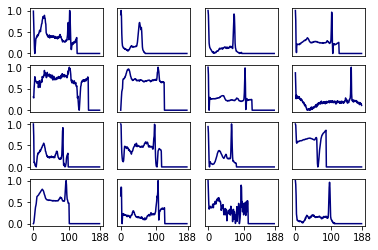

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=4)

for i, ax in enumerate(fig.axes):
    X.iloc[i,:].plot(ax=ax, color='navy')
    ax.set_xticks([])
    ax.set_yticks([])
for i in [0, 4, 8, 12]:
    fig.axes[i].set_yticks([0, 0.5, 1])
for i in [12, 13, 14, 15]:
    fig.axes[i].set_xticks([0, 100, 188])    
plt.show()


In [37]:
pca = PCA().fit(X)
evr = np.cumsum(pca.explained_variance_ratio_)
cut = evr[evr>=0.99][0]
cut_index = np.where(evr == cut)

In [ ]:
plt.figure()
plt.plot(evr)
plt.plot(cut_index, cut, 'ro')
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [64]:
n_components = cut_index.item()
ipca = IncrementalPCA(n_components=n_components, batch_size=100)
X_ipca = ipca.fit_transform(X)

# plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, color='navy')
# plt.show()

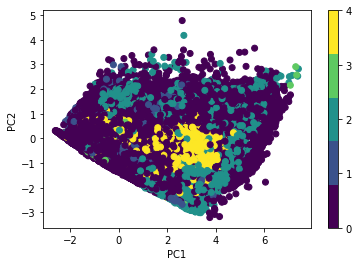

In [72]:
# colors = ['navy', 'turquoise', 'darkorange', 'green', 'red']
colors = ['#440154', '#3B528B', '#21918B', '#5EC962', '#FDE725']

plt.scatter(X_ipca[:, 0], X_ipca[:, 1], c=Y, cmap=mpl.colors.ListedColormap(colors))
plt.xlabel("PC1")
plt.ylabel("PC2")
cb = plt.colorbar()
cb.set_ticks([0, 1, 2, 3, 4])
# cb.set_ticklabels(colors)
plt.show()

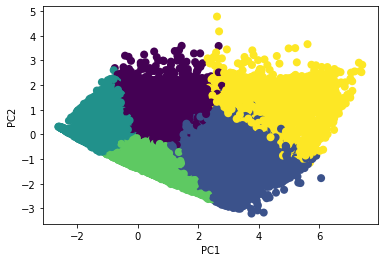

In [73]:
km = KMeans(n_clusters=5)
y_pred = km.fit_predict(X=X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred, cmap=mpl.colors.ListedColormap(colors))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

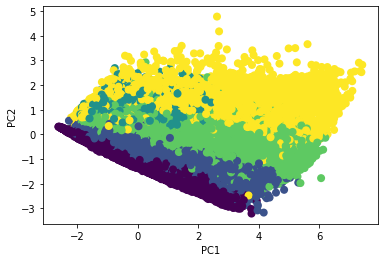

In [74]:
gmm = GaussianMixture(n_components=5, covariance_type='full',
                              max_iter=100).fit(X_ipca)
y_pred = gmm.predict(X_ipca)
plt.scatter(X_ipca[:, 0], X_ipca[:, 1], lw=2, c=y_pred, cmap=mpl.colors.ListedColormap(colors))
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()